In [1]:
# pip install torch

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pymongo import MongoClient
from alpha_vantage.timeseries import TimeSeries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,8)


In [3]:
try:
    server = MongoClient('mongodb://localhost:27017/')
    print('Connected successfully :D')
except:
    print('Could not connect to MongoDB :(')

db = server['trading']
companies = server['companies']

Connected successfully :D


In [4]:
df = pd.DataFrame(list(db.companies.find({})))
df = df.drop('_id', axis=1)
df = df.sort_values('Date', ignore_index=True)
df

,Company,Date,Open,High,Low,Close,Volume
0,MSFT,1999-11-01,93.2500,94.1900,92.1200,92.3700,26630600
1,IBM,1999-11-01,98.5000,98.8100,96.3700,96.7500,9551800
2,AAPL,1999-11-01,80.0000,80.6900,77.3700,77.6200,2487300
3,AAPL,1999-11-02,78.0000,81.6900,77.3100,80.2500,3564600
4,IBM,1999-11-02,96.7500,96.8100,93.6900,94.8100,11105400
...,...,...,...,...,...,...,...
15766,MSFT,2020-09-21,197.1900,202.7100,196.3800,202.5400,39839657
15767,IBM,2020-09-21,120.4800,120.7000,118.5800,120.2500,5311441
15768,AAPL,2020-09-22,112.6800,112.8600,109.1600,111.8100,181592150
15769,MSFT,2020-09-22,205.0600,208.1000,202.0750,207.4200,33223556


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15771 entries, 0 to 15770
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  15771 non-null  object
 1   Date     15771 non-null  object
 2   Open     15771 non-null  object
 3   High     15771 non-null  object
 4   Low      15771 non-null  object
 5   Close    15771 non-null  object
 6   Volume   15771 non-null  object
dtypes: object(7)
memory usage: 862.6+ KB


In [6]:
df.describe()

,Company,Date,Open,High,Low,Close,Volume
count,15771,15771,15771,15771,15771,15771,15771
unique,3,5257,10347,10390,10540,10772,15551
top,MSFT,2013-06-05,105.0000,26.0000,25.5000,27.2500,7122300
freq,5257,3,12,16,17,12,3


## IBM Data

In [21]:
ibm = pd.DataFrame(list(db.companies.find({ 'Company': 'IBM' })))
ibm = ibm.drop('_id', axis=1)
ibm = ibm.sort_values('Date', ignore_index=True)
ibm

,Company,Date,Open,High,Low,Close,Volume
0,IBM,1999-11-01,98.5000,98.8100,96.3700,96.7500,9551800
1,IBM,1999-11-02,96.7500,96.8100,93.6900,94.8100,11105400
2,IBM,1999-11-03,95.8700,95.9400,93.5000,94.3700,10369100
3,IBM,1999-11-04,94.4400,94.4400,90.0000,91.5600,16697600
4,IBM,1999-11-05,92.7500,92.9400,90.1900,90.2500,13737600
...,...,...,...,...,...,...,...
5252,IBM,2020-09-16,122.7100,125.8200,122.7100,124.2200,3789458
5253,IBM,2020-09-17,122.6200,125.5500,121.9700,124.9200,3171262
5254,IBM,2020-09-18,124.2600,124.9200,122.6500,122.7600,5391570
5255,IBM,2020-09-21,120.4800,120.7000,118.5800,120.2500,5311441


In [8]:
ibm = ibm.sort_values('Date')
ibm

,Company,Date,Open,High,Low,Close,Volume
5256,IBM,1999-11-01,98.5000,98.8100,96.3700,96.7500,9551800
5255,IBM,1999-11-02,96.7500,96.8100,93.6900,94.8100,11105400
5254,IBM,1999-11-03,95.8700,95.9400,93.5000,94.3700,10369100
5253,IBM,1999-11-04,94.4400,94.4400,90.0000,91.5600,16697600
5252,IBM,1999-11-05,92.7500,92.9400,90.1900,90.2500,13737600
...,...,...,...,...,...,...,...
4,IBM,2020-09-16,122.7100,125.8200,122.7100,124.2200,3789458
3,IBM,2020-09-17,122.6200,125.5500,121.9700,124.9200,3171262
2,IBM,2020-09-18,124.2600,124.9200,122.6500,122.7600,5391570
1,IBM,2020-09-21,120.4800,120.7000,118.5800,120.2500,5311441


## IBM - Stock Price comparison by months (High & Low) (Open & Close)

In [9]:
ALPHA_VANTAGE_API_KEY = open('key.txt', 'r').read()
ts = TimeSeries(key=ALPHA_VANTAGE_API_KEY, output_format='pandas')


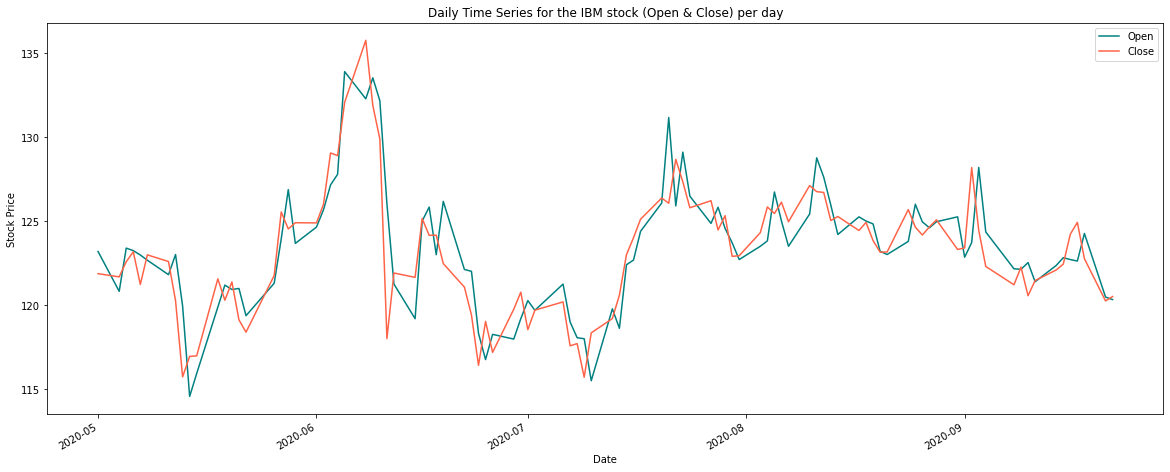

In [10]:
data, meta_data = ts.get_daily(symbol='IBM')
data['1. open'].plot(color='teal', label='Open')
data['4. close'].plot(color='tomato', label='Close')
plt.legend()
plt.title('Daily Time Series for the IBM stock (Open & Close) per day')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [11]:
dfDaily = pd.DataFrame(data)
print('Stock Price Par jour :')
dfDaily = dfDaily.reset_index()
dfDaily.head(10)

Stock Price Par jour :


,date,1. open,2. high,3. low,4. close,5. volume
0,2020-09-22,120.33,121.4500,119.53,120.51,2932672.0
1,2020-09-21,120.48,120.7000,118.58,120.25,5311441.0
2,2020-09-18,124.26,124.9200,122.65,122.76,5391570.0
3,2020-09-17,122.62,125.5500,121.97,124.92,3171262.0
4,2020-09-16,122.71,125.8200,122.71,124.22,3789458.0
5,2020-09-15,122.82,123.4000,122.24,122.44,2915221.0
6,2020-09-14,122.36,123.3800,121.76,122.09,3641887.0
7,2020-09-11,121.39,122.7000,120.73,121.46,3548091.0
8,2020-09-10,122.53,123.5764,120.24,120.56,3978805.0
9,2020-09-09,122.13,123.7000,121.29,122.26,3770678.0


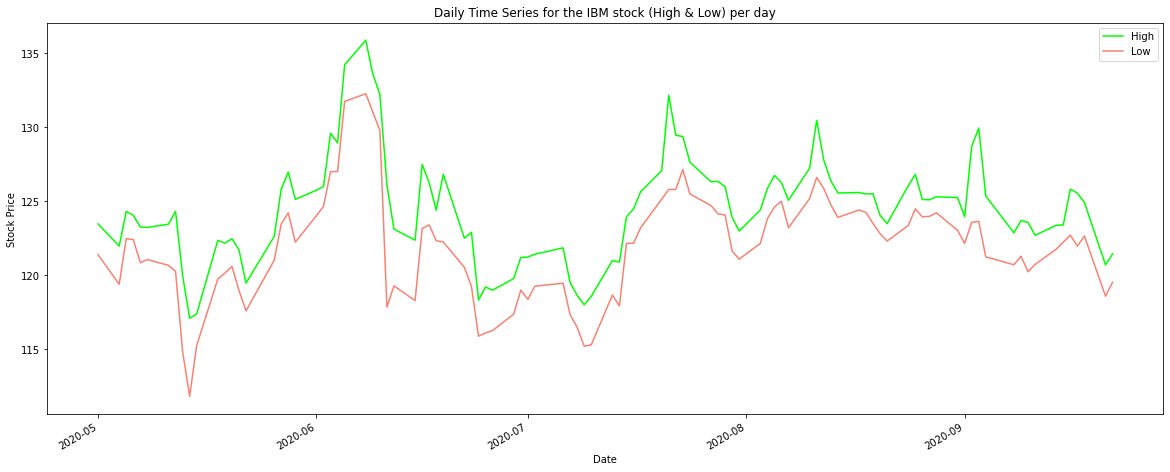

In [12]:
data['2. high'].plot(color='lime', label='High')
data['3. low'].plot(color='salmon', label='Low')
plt.legend()
plt.title('Daily Time Series for the IBM stock (High & Low) per day')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

## Volume

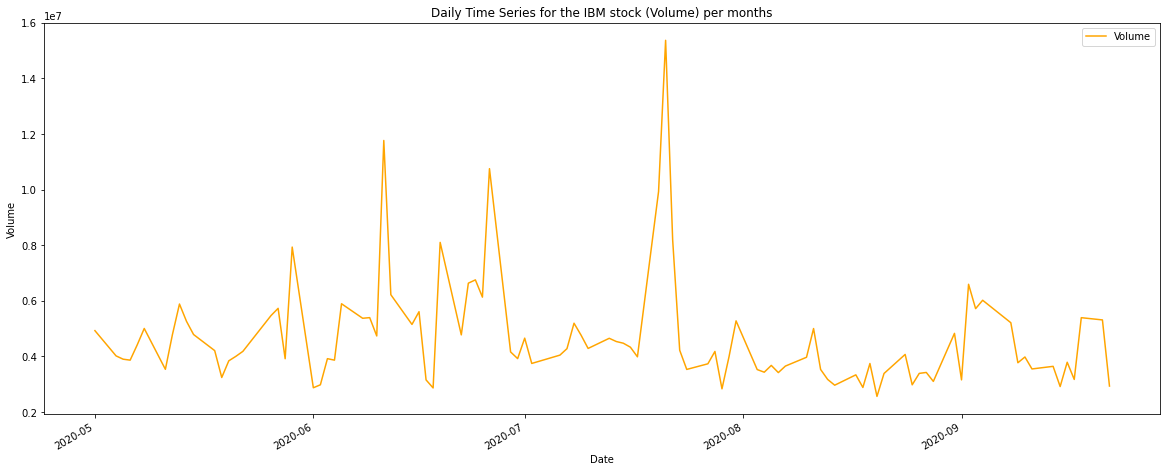

In [13]:
data['5. volume'].plot(color='orange', label='Volume')
plt.legend()
plt.title('Daily Time Series for the IBM stock (Volume) per months')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

## IBM - Stock Price comparison by minutes (High & Low) (Open & Close)

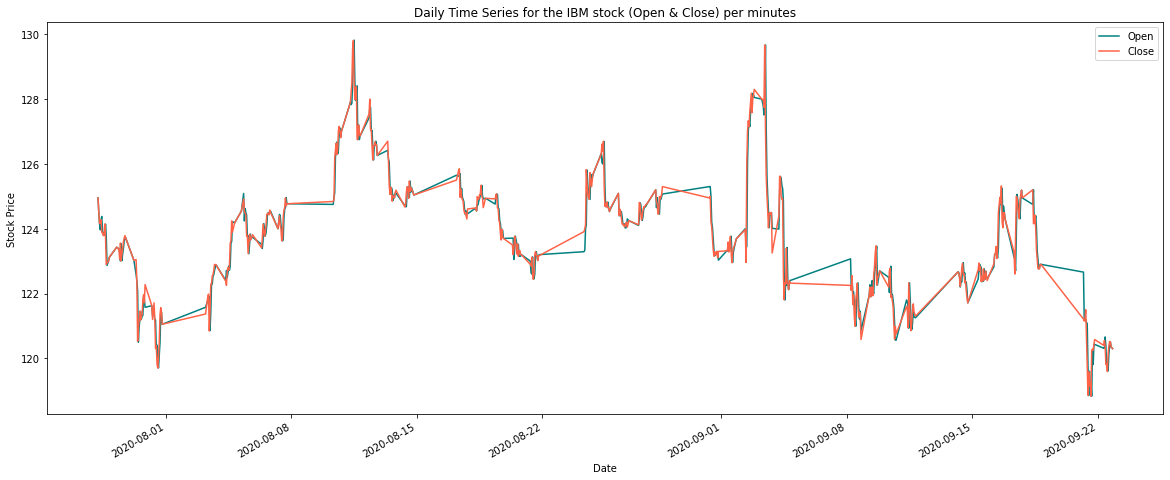

In [14]:
dataIntra, meta_dataIntra = ts.get_intraday(symbol='IBM', interval='60min', outputsize='full')
dataIntra['1. open'].plot(color='teal', label='Open')
dataIntra['4. close'].plot(color='tomato', label='Close')
plt.legend()
plt.title('Daily Time Series for the IBM stock (Open & Close) per minutes')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [15]:
dfIntra = pd.DataFrame(dataIntra)
print('Stock Price Par heure :')
dfIntra = dfIntra.reset_index()
dfIntra.head(13)

Stock Price Par heure :


,date,1. open,2. high,3. low,4. close,5. volume
0,2020-09-22 20:00:00,120.3000,120.3000,120.30,120.30,1111.0
1,2020-09-22 18:00:00,120.3500,120.3500,120.35,120.35,200.0
2,2020-09-22 17:00:00,120.5100,120.5100,120.40,120.51,62054.0
3,2020-09-22 16:00:00,120.3700,120.8099,120.29,120.52,506209.0
4,2020-09-22 15:00:00,120.1300,120.5080,120.12,120.37,330986.0
5,2020-09-22 14:00:00,119.6100,120.3268,119.57,120.12,234218.0
6,2020-09-22 13:00:00,119.8250,120.0800,119.53,119.59,205768.0
7,2020-09-22 12:00:00,119.8100,120.1900,119.67,119.83,275745.0
8,2020-09-22 11:00:00,120.3800,121.4500,119.81,119.81,387665.0
9,2020-09-22 10:00:00,120.6599,121.1494,119.90,120.40,444050.0


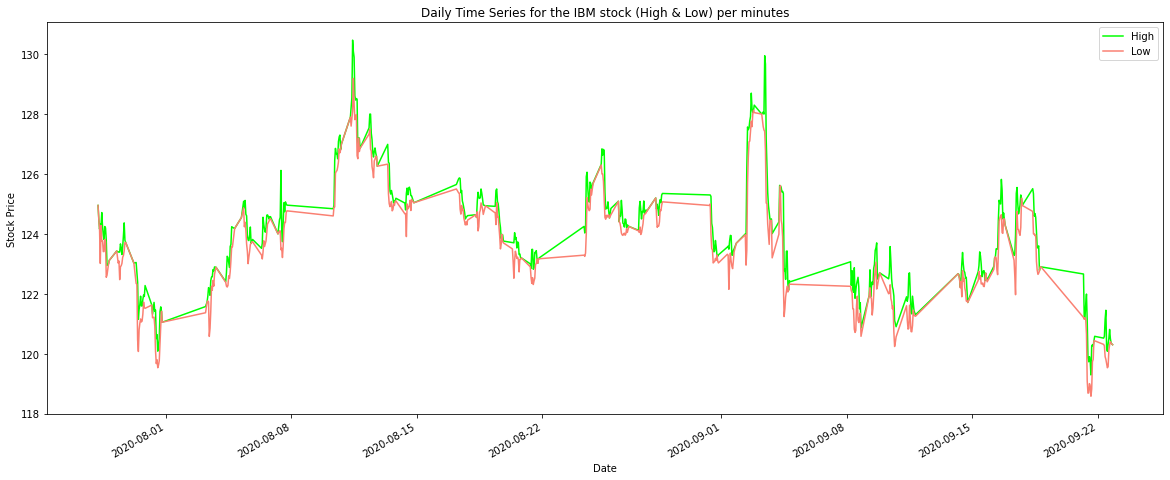

In [16]:
dataIntra['2. high'].plot(color='lime', label='High')
dataIntra['3. low'].plot(color='salmon', label='Low')
plt.legend()
plt.title('Daily Time Series for the IBM stock (High & Low) per minutes')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

## LTSM

## Apple Data

In [17]:
apple = pd.DataFrame(list(db.companies.find({ 'Company': 'AAPL' })))
apple = apple.drop('_id', axis=1)
apple

,Company,Date,Open,High,Low,Close,Volume
0,AAPL,2020-09-22,112.6800,112.8600,109.1600,111.8100,181592150
1,AAPL,2020-09-21,104.5400,110.1900,103.1000,110.0800,195713815
2,AAPL,2020-09-18,110.4000,110.8800,106.0900,106.8400,287104882
3,AAPL,2020-09-17,109.7200,112.2000,108.7100,110.3400,178010968
4,AAPL,2020-09-16,115.2300,116.0000,112.0400,112.1300,155026675
...,...,...,...,...,...,...,...
5252,AAPL,1999-11-05,84.6200,88.3700,84.0000,88.3100,3721500
5253,AAPL,1999-11-04,82.0600,85.3700,80.6200,83.6200,3384700
5254,AAPL,1999-11-03,81.6200,83.2500,81.0000,81.5000,2932700
5255,AAPL,1999-11-02,78.0000,81.6900,77.3100,80.2500,3564600


## Microsoft Data

In [18]:
microsoft = pd.DataFrame(list(db.companies.find({ 'Company': 'MSFT' })))
microsoft = microsoft.drop('_id', axis=1)
microsoft

,Company,Date,Open,High,Low,Close,Volume
0,MSFT,2020-09-22,205.0600,208.1000,202.0750,207.4200,33223556
1,MSFT,2020-09-21,197.1900,202.7100,196.3800,202.5400,39839657
2,MSFT,2020-09-18,202.8000,203.6500,196.2500,200.3900,55225326
3,MSFT,2020-09-17,200.0500,204.3300,199.9600,202.9100,34011257
4,MSFT,2020-09-16,210.6200,210.6500,204.6400,205.0500,26372464
...,...,...,...,...,...,...,...
5252,MSFT,1999-11-05,91.8100,92.8700,90.5000,91.5600,35083700
5253,MSFT,1999-11-04,92.3100,92.7500,90.3100,91.7500,27119700
5254,MSFT,1999-11-03,92.9400,93.5000,91.5000,92.0000,22258500
5255,MSFT,1999-11-02,92.7500,94.5000,91.9400,92.5600,23174500
